# Perkenalan

Nama : Pramudya Adi Nugraha

Batch : 10

Dataset : Employees Burning Out Dataset

Objective :
- Mampu memahami konsep supervised learning dan unsupervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
- Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning
- Mampu melakukan model deployment

# Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
import scipy.stats as stats
from scipy.stats import norm
from feature_engine.imputation import MeanMedianImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, r2_score, mean_absolute_error as mae
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import pickle
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
# Load Dataset 

data = pd.read_csv('train.csv')
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [3]:
# Melihat 5 data teratas

data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [4]:
# Duplicate Dataset

data_copy = data.copy()

In [5]:
# Check Dataset Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [6]:
# Check dataset column

data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [7]:
# Dataset describe

data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


# Exploratory Data Analysis (EDA)

In [8]:
# mencari tahu shape dari dataset

data.shape

(22750, 9)

In [9]:
# mencari tahu jumlah missing data pada masing-masing kolom

data_miss = data.isnull().sum()
data_miss.sort_values()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Burn Rate               1124
Resource Allocation     1381
Mental Fatigue Score    2117
dtype: int64

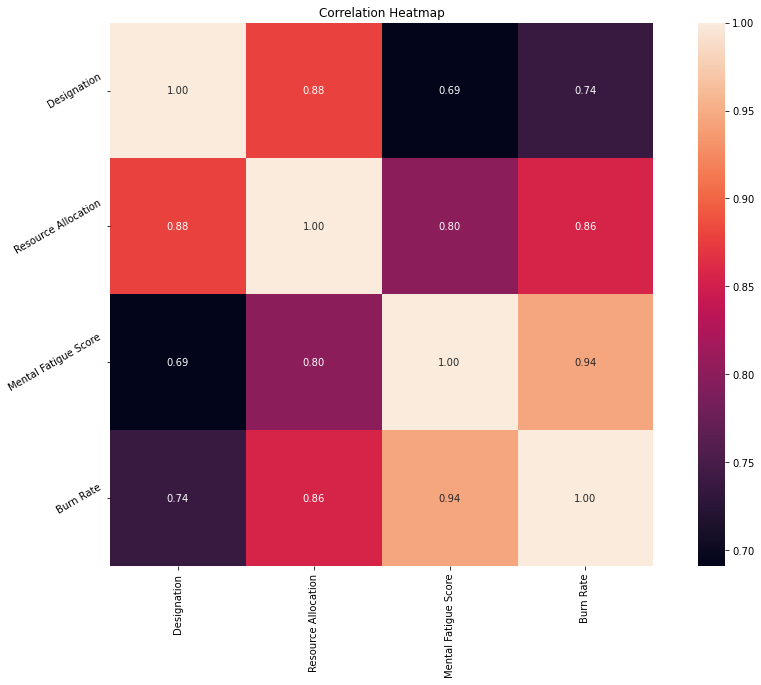

In [10]:
# mencari tahu hubungan antar column pada datset dengan menggunakan heatmap 

correlation = data.corr()

plt.figure(figsize=(16,10))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [11]:
# Mencari tahu tabel yang memiliki bentuk numerical dan catagorical

data_num = data.select_dtypes(include= np.number).columns.tolist()
data_cat = data.select_dtypes(include=['object']).columns.tolist()

print('Kolom bertype numeric pada dataset :', data_num)
print('Kolom bertype catagorical pada dataset :', data_cat)

Kolom bertype numeric pada dataset : ['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']
Kolom bertype catagorical pada dataset : ['Employee ID', 'Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available']


In [12]:
# Checking missing value for each column

data_miss.sort_values(ascending= False)

Mental Fatigue Score    2117
Resource Allocation     1381
Burn Rate               1124
Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
dtype: int64

In [13]:
# Check missing value in `Mental Fatigue Score` Column

data['Mental Fatigue Score'].isnull().sum()

2117

In [14]:
# Check unique values in `Mental Fatigue Score` Column

data['Mental Fatigue Score'].unique()

array([ 3.8,  5. ,  5.8,  2.6,  6.9,  3.6,  7.9,  4.4,  nan,  5.3,  1.8,
        4.7,  5.9,  6.7,  4. ,  7.6,  6.3,  7.7,  6.6,  7.4,  3.9,  3. ,
        8.7,  7.3,  5.4,  6. ,  7.5, 10. ,  6.4,  5.1,  5.6,  6.1,  3.1,
        8. ,  6.8,  4.9,  9.2,  6.5,  6.2,  8.2,  4.1,  4.3,  0.8,  2.9,
        2. ,  9.1,  0. ,  5.7,  8.3,  5.5,  7. ,  3.3,  7.8,  7.2,  5.2,
        8.9,  4.5,  8.1,  8.6,  9.5,  3.5,  4.8,  2.4,  3.7,  1. ,  8.8,
        9.3,  4.6,  9.9,  0.5,  2.8,  9. ,  3.4,  4.2,  1.6,  2.7,  1.3,
        3.2,  8.4,  7.1,  9.4,  2.1,  9.7,  2.5,  1.9,  1.7,  9.6,  0.7,
        0.2,  1.2,  8.5,  9.8,  2.2,  1.1,  0.9,  2.3,  0.4,  1.4,  1.5,
        0.6,  0.3,  0.1])

In [15]:
# Frekuensi distribusi value pada kolom `Mental Fatigue Score`

data['Mental Fatigue Score'].value_counts()

6.0    470
5.8    464
5.9    458
6.1    457
6.3    454
      ... 
0.5     24
0.2     23
0.4     19
0.1     17
0.3     13
Name: Mental Fatigue Score, Length: 101, dtype: int64

In [16]:
# Frekuensi distribusi value pada kolom `Mental Fatigue Score` dalam persentase

data['Mental Fatigue Score'].value_counts()/len(data) * 100

6.0    2.065934
5.8    2.039560
5.9    2.013187
6.1    2.008791
6.3    1.995604
         ...   
0.5    0.105495
0.2    0.101099
0.4    0.083516
0.1    0.074725
0.3    0.057143
Name: Mental Fatigue Score, Length: 101, dtype: float64

In [17]:
# Persentase perbandindingan data tidak missing dengan data missing pada kolom `Mental Fatigue Score`

print('Presentase data tidak NaN : ', data['Mental Fatigue Score'].value_counts().sum()/len(data)*100)
print('Persentase data NaN : ', data['Mental Fatigue Score'].isnull().sum()/len(data)*100)

Presentase data tidak NaN :  90.69450549450549
Persentase data NaN :  9.305494505494504


In [18]:
# Check missing value in `Resource Allocation` Column

data['Resource Allocation'].isnull().sum()

1381

In [19]:
# Check unique values in `Resource Allocation` Column

data['Resource Allocation'].unique()

array([ 3.,  2., nan,  1.,  7.,  4.,  6.,  5.,  8., 10.,  9.])

In [20]:
# Frekuensi distribusi value pada kolom `Resource Allocation`

data['Resource Allocation'].value_counts()

4.0     3893
5.0     3861
3.0     3192
6.0     2943
2.0     2075
7.0     1965
1.0     1791
8.0     1044
9.0      446
10.0     159
Name: Resource Allocation, dtype: int64

In [21]:
# Frekuensi distribusi value pada kolom `Resource Allocation` dalam persentase

data['Resource Allocation'].value_counts()/len(data) * 100

4.0     17.112088
5.0     16.971429
3.0     14.030769
6.0     12.936264
2.0      9.120879
7.0      8.637363
1.0      7.872527
8.0      4.589011
9.0      1.960440
10.0     0.698901
Name: Resource Allocation, dtype: float64

In [22]:
# Persentase perbandindingan data tidak missing dengan data missing pada kolom `Resource Allocation`

print('Presentase data tidak NaN : ', data['Resource Allocation'].value_counts().sum()/len(data)*100)
print('Persentase data NaN : ', data['Resource Allocation'].isnull().sum()/len(data)*100)

Presentase data tidak NaN :  93.92967032967033
Persentase data NaN :  6.07032967032967


In [23]:
# Check missing value in `Burn Rate` Column

data['Burn Rate'].isnull().sum()

1124

In [24]:
# Check unique values in `Burn Rate` Column

data['Burn Rate'].unique()

array([0.16, 0.36, 0.49, 0.2 , 0.52, 0.29, 0.62, 0.33, 0.56, 0.67, 0.5 ,
       0.12, 0.4 , 0.51, 0.32, 0.39, 0.59, 0.22, 0.68, 0.57, 0.47, 0.46,
       0.61, 0.91, 0.44, 0.6 , 0.45, 0.19, 0.31, 0.81, 0.42, 0.53,  nan,
       0.94, 0.37, 0.65, 0.38, 0.15, 0.26, 0.28, 0.71, 0.8 , 0.63, 0.79,
       0.72, 0.34, 0.27, 0.66, 0.04, 0.05, 0.11, 0.41, 0.76, 0.43, 0.85,
       0.35, 0.  , 0.55, 0.48, 0.7 , 0.18, 0.23, 0.25, 0.75, 0.1 , 0.73,
       0.58, 0.88, 0.77, 0.3 , 0.06, 0.03, 0.69, 0.24, 0.74, 0.86, 0.92,
       0.78, 0.21, 0.98, 0.02, 0.82, 0.93, 0.83, 0.87, 0.64, 0.54, 0.17,
       1.  , 0.08, 0.09, 0.14, 0.13, 0.07, 0.84, 0.99, 0.01, 0.97, 0.95,
       0.9 , 0.96, 0.89])

In [25]:
# Frekuensi distribusi value pada kolom `Burn Rate`

data['Burn Rate'].value_counts(dropna= False)

NaN     1124
0.47     475
0.43     444
0.41     434
0.45     431
        ... 
0.98      18
0.97      17
0.95      17
0.96      13
0.99       8
Name: Burn Rate, Length: 102, dtype: int64

In [26]:
# Frekuensi distribusi value pada kolom `Burn Rate` dalam persentase

data['Burn Rate'].value_counts(dropna= False)/len(data) * 100

NaN     4.940659
0.47    2.087912
0.43    1.951648
0.41    1.907692
0.45    1.894505
          ...   
0.98    0.079121
0.97    0.074725
0.95    0.074725
0.96    0.057143
0.99    0.035165
Name: Burn Rate, Length: 102, dtype: float64

In [27]:
# Persentase perbandindingan data tidak missing dengan data missing pada kolom `Burn Rate`

print('Presentase data tidak NaN : ', data['Burn Rate'].value_counts().sum()/len(data)*100)
print('Persentase data NaN : ', data['Burn Rate'].isnull().sum()/len(data)*100)

Presentase data tidak NaN :  95.05934065934066
Persentase data NaN :  4.94065934065934


# Data Preprocessing

In [28]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [29]:
data_miss.sort_values(ascending= False)

Mental Fatigue Score    2117
Resource Allocation     1381
Burn Rate               1124
Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
dtype: int64

In [30]:
# Karena pada kolom `Burn Rate` yang akan dijadikan sebagai target terdapat beberapa nilai missing value, maka akan dilakukan drop terhadap nilai missing value tersebut

data.dropna(subset= ['Burn Rate'], inplace= True)

In [31]:
data['Burn Rate'].isnull().value_counts()

False    21626
Name: Burn Rate, dtype: int64

In [32]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [33]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state= 18)
data_inf_clear = data_inf.dropna()
data_inf_clear

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
1611,fffe33003400350030003300,2008-02-10,Female,Service,Yes,1.0,2.0,1.9,0.14
20952,fffe3700320037003700,2008-09-10,Female,Service,No,3.0,7.0,9.0,0.79
7766,fffe32003700390034003700,2008-11-23,Female,Service,No,4.0,7.0,6.8,0.68
15886,fffe340038003000,2008-08-31,Female,Service,Yes,2.0,4.0,5.7,0.37
15841,fffe31003000380035003100,2008-11-02,Male,Service,No,3.0,6.0,5.7,0.55
1241,fffe3900370030003400,2008-09-24,Male,Service,No,5.0,10.0,9.4,1.00
11666,fffe3700350034003200,2008-04-02,Female,Product,Yes,3.0,5.0,6.2,0.48
472,fffe31003600340037003100,2008-01-14,Male,Service,Yes,1.0,3.0,4.9,0.43


In [34]:
# Remove Inference-Set from Dataset

data_new = data.drop(data_inf_clear.index)
data_new

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [35]:
# Reset Index

data_new.reset_index(drop=True, inplace=True)
data_inf_clear.reset_index(drop=True, inplace=True)
data_inf_clear

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe33003400350030003300,2008-02-10,Female,Service,Yes,1.0,2.0,1.9,0.14
1,fffe3700320037003700,2008-09-10,Female,Service,No,3.0,7.0,9.0,0.79
2,fffe32003700390034003700,2008-11-23,Female,Service,No,4.0,7.0,6.8,0.68
3,fffe340038003000,2008-08-31,Female,Service,Yes,2.0,4.0,5.7,0.37
4,fffe31003000380035003100,2008-11-02,Male,Service,No,3.0,6.0,5.7,0.55
5,fffe3900370030003400,2008-09-24,Male,Service,No,5.0,10.0,9.4,1.00
6,fffe3700350034003200,2008-04-02,Female,Product,Yes,3.0,5.0,6.2,0.48
7,fffe31003600340037003100,2008-01-14,Male,Service,Yes,1.0,3.0,4.9,0.43


## Splitting Dataset

In [36]:
# Split between X (features) and y (target)

X = data_new.drop('Burn Rate', axis=1)
y = data_new['Burn Rate']
X

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9
...,...,...,...,...,...,...,...,...
21613,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN
21614,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7
21615,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN
21616,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9


In [37]:
y

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
21613    0.41
21614    0.59
21615    0.72
21616    0.52
21617    0.61
Name: Burn Rate, Length: 21618, dtype: float64

In [38]:
# Split between Train-Set and Test-Set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

print('X Train Size : ', X_train.shape)
print('X Test Size  : ', X_test.shape)
print('y Train Size : ', y_train.shape)
print('y Test Size  : ', y_test.shape)

X Train Size :  (17294, 8)
X Test Size  :  (4324, 8)
y Train Size :  (17294,)
y Test Size  :  (4324,)


---
## Handling Outlier

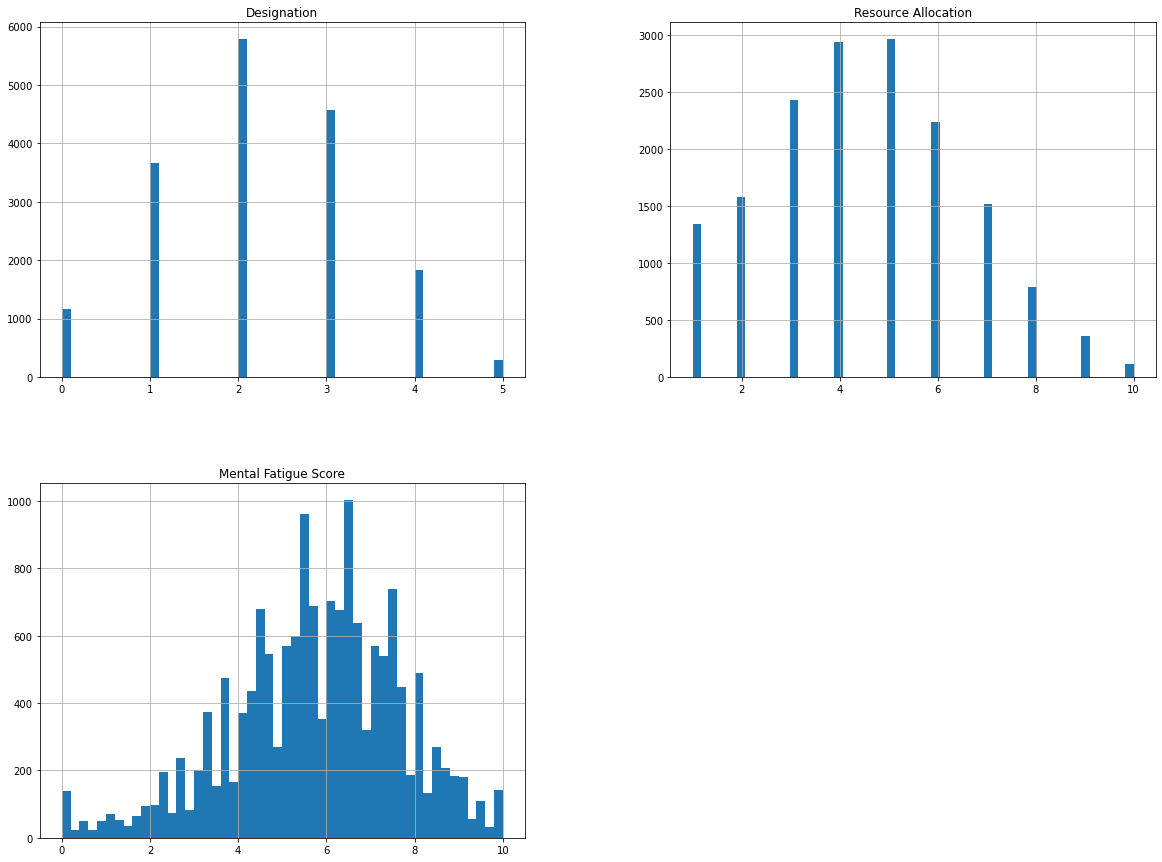

In [39]:
# Mencari tahu distribusi data dan visualisasi

X_train.hist(bins=50, figsize=(20,15))
plt.show()

In [40]:
def skew_func (data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    print(f'Skewness of {column} = ', skewness)

In [41]:
num_columns = X_train.select_dtypes(include= np.number).columns.tolist()

In [42]:
for column in num_columns:
    skew_func(data, column)

Skewness of Designation =  0.0894438025648196
Skewness of Resource Allocation =  0.2019218152163508
Skewness of Mental Fatigue Score =  -0.4326392073866475


In [43]:
def outiers_val(data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    if skewness <= 0.5 and skewness >= -0.5:
        batas_atas = data[column].mean() + 3 * data[column].std()
        batas_bawah =  data[column].mean() - 3 * data[column].std()
        print('[Normal]')
        print(f'Batas atas {column} = {batas_atas}')
        print(f'Batas bawah {column} = {batas_bawah}')
        print('Total data melebihi batas atas : {}'.format(len(data[data[column] > batas_atas])))
        print('Total data kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah])))
        print('% melebihi batas atas : {}'.format(len(data[data[column] > batas_atas]) / len(data) * 100 ))
        print('% kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah]) / len(data) * 100 ))
        print('-'*100)
    else:
        IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
        batas_bawah = data[column].quantile(0.25) - (IQR * 1.5)
        batas_atas = data[column].quantile(0.75) + (IQR * 1.5)
        print('[Skewed]')
        print(f'Batas atas dari {column} = {batas_atas}')
        print(f'Batas bawah dari {column} = {batas_bawah}')
        print('Total data melebihi batas atas : {}'.format(len(data[data[column] > batas_atas])))
        print('Total data kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah])))
        print('% melebihi batas atas : {}'.format(len(data[data[column] > batas_atas]) / len(data) * 100 ))
        print('% kurang dari batas bawah : {}'.format(len(data[data[column] < batas_bawah]) / len(data) * 100 ))
        print('-'*100)

In [44]:
num_data_outlier = X_train.select_dtypes(include= np.number).columns.tolist()

In [45]:
for features in num_data_outlier:
    outiers_val(X_train, features)

[Normal]
Batas atas Designation = 5.587463996481671
Batas bawah Designation = -1.2234070981354241
Total data melebihi batas atas : 0
Total data kurang dari batas bawah : 0
% melebihi batas atas : 0.0
% kurang dari batas bawah : 0.0
----------------------------------------------------------------------------------------------------
[Normal]
Batas atas Resource Allocation = 10.630811133746311
Batas bawah Resource Allocation = -1.6472206967725551
Total data melebihi batas atas : 0
Total data kurang dari batas bawah : 0
% melebihi batas atas : 0.0
% kurang dari batas bawah : 0.0
----------------------------------------------------------------------------------------------------
[Normal]
Batas atas Mental Fatigue Score = 11.49738751007342
Batas bawah Mental Fatigue Score = -0.03186720550488076
Total data melebihi batas atas : 0
Total data kurang dari batas bawah : 0
% melebihi batas atas : 0.0
% kurang dari batas bawah : 0.0
------------------------------------------------------------------

Dari hasil analisa outlier di atas tidak terdapat nilai outlier pada semua kolom, sehingga tidak akan dilakukan trimming ataupun caping pada dataset

In [46]:
X_train

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
17315,fffe31003400360032003900,2008-09-27,Male,Product,Yes,2.0,5.0,6.3
3444,fffe33003200370037003000,2008-04-02,Female,Service,Yes,2.0,3.0,4.8
9309,fffe31003200320036003500,2008-05-14,Male,Product,Yes,4.0,6.0,7.7
4784,fffe32003300380039003900,2008-12-01,Female,Product,Yes,1.0,1.0,0.0
8907,fffe31003100390037003400,2008-06-28,Male,Service,Yes,3.0,4.0,7.0
...,...,...,...,...,...,...,...,...
18674,fffe3800370035003300,2008-02-18,Male,Product,No,3.0,5.0,5.3
5294,fffe32003900350038003100,2008-06-28,Male,Service,No,4.0,8.0,8.0
16305,fffe32003800370036003600,2008-01-06,Female,Service,No,2.0,4.0,7.5
1726,fffe32003100320036003900,2008-04-19,Male,Service,Yes,1.0,2.0,4.9


In [47]:
y_train_new = y_train[X_train.index]
y_train_new.shape

(17294,)

---
## Handling Missing Values

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17294 entries, 17315 to 2885
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           17294 non-null  object 
 1   Date of Joining       17294 non-null  object 
 2   Gender                17294 non-null  object 
 3   Company Type          17294 non-null  object 
 4   WFH Setup Available   17294 non-null  object 
 5   Designation           17294 non-null  float64
 6   Resource Allocation   16271 non-null  float64
 7   Mental Fatigue Score  15760 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.2+ MB


In [49]:
# Check missing values on X_train

X_train.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1023
Mental Fatigue Score    1534
dtype: int64

In [50]:
# handling missing value pada kolom numerical
# karena data pada kolom numerical terdistribusi normal, maka proses imputasi nilai pada kolom yang terdapat missing value menggunakan nilai mean

miss_num = MeanMedianImputer(imputation_method= 'mean',
                              variables= ['Resource Allocation',
                                          'Mental Fatigue Score'])
miss_num.fit(X_train)
X_train_handled = miss_num.transform(X_train)
X_test = miss_num.transform(X_test)

In [51]:
X_train_handled.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [52]:
# Check missing values on X_test

X_test.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [53]:
# Check missing values on y_train

y_train_new.isnull().sum()

0

In [54]:
# Check missing values on y_test

y_test.isnull().sum()

0

---
## Feature Selection

In [55]:
# Display X_train_handled

X_train_handled

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
17315,fffe31003400360032003900,2008-09-27,Male,Product,Yes,2.0,5.0,6.3
3444,fffe33003200370037003000,2008-04-02,Female,Service,Yes,2.0,3.0,4.8
9309,fffe31003200320036003500,2008-05-14,Male,Product,Yes,4.0,6.0,7.7
4784,fffe32003300380039003900,2008-12-01,Female,Product,Yes,1.0,1.0,0.0
8907,fffe31003100390037003400,2008-06-28,Male,Service,Yes,3.0,4.0,7.0
...,...,...,...,...,...,...,...,...
18674,fffe3800370035003300,2008-02-18,Male,Product,No,3.0,5.0,5.3
5294,fffe32003900350038003100,2008-06-28,Male,Service,No,4.0,8.0,8.0
16305,fffe32003800370036003600,2008-01-06,Female,Service,No,2.0,4.0,7.5
1726,fffe32003100320036003900,2008-04-19,Male,Service,Yes,1.0,2.0,4.9


In [56]:
X_test_handled = X_test.copy()
X_test_handled

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
18169,fffe3400330032003900,2008-03-15,Female,Service,No,2.0,3.000000,3.7
7422,fffe32003400370035003000,2008-01-17,Male,Service,No,2.0,3.000000,3.7
18739,fffe32003000380032003400,2008-01-26,Male,Product,No,4.0,4.491795,8.2
10921,fffe3800390032003100,2008-09-18,Female,Service,No,1.0,2.000000,2.9
8642,fffe32003800380036003000,2008-05-10,Male,Service,No,2.0,5.000000,7.2
...,...,...,...,...,...,...,...,...
3663,fffe31003100370031003000,2008-07-18,Female,Service,Yes,1.0,2.000000,4.6
9665,fffe31003900350033003600,2008-05-19,Male,Product,No,2.0,4.000000,6.2
17011,fffe32003200360038003100,2008-04-13,Male,Service,No,1.0,4.000000,4.0
13786,fffe32003900320030003500,2008-02-23,Female,Service,Yes,2.0,4.000000,5.7


In [57]:
y_train_table = pd.DataFrame(y_train_new, columns= ['Burn Rate'])
y_train_table

,Burn Rate
17315,0.56
3444,0.26
9309,0.64
4784,0.00
8907,0.48
...,...
18674,0.44
5294,0.77
16305,0.64
1726,0.38


In [58]:
# menggabungkan X_train_handled dan y_train_table

data_kor = X_train_handled.copy()
data_kor['Burn Rate'] = y_train_table['Burn Rate']
data_kor.shape

(17294, 9)

<AxesSubplot:>

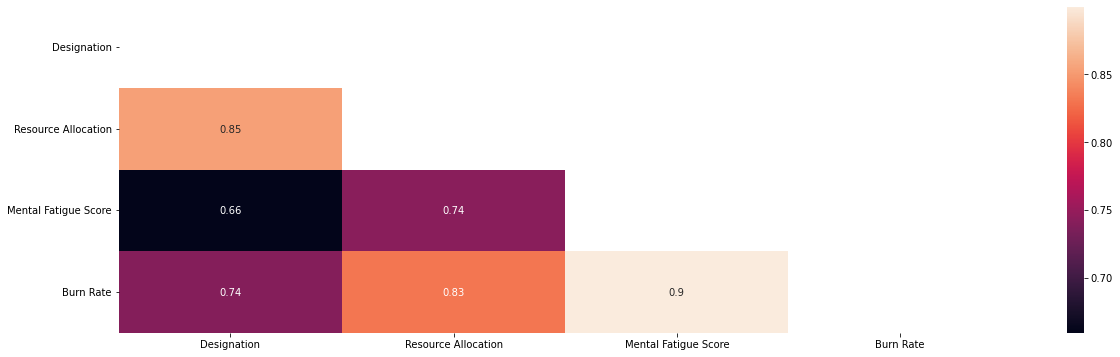

In [59]:
plt.figure(figsize=(20,6))
sns.heatmap(data_kor.corr(),annot=True, mask=np.triu(data_kor.corr()))

- Kolom numerical dengan tingkat korelasi tertinggi yaitu kolom `Mental Fatigue Score`, sedangkan kolom numerical dengan korelasi terkecil adalah kolom `Designation`
- Karena setiap kolom numerical yang terdapat pada dataset memiliki nilai korelasi yang tinggi, maka tidak akan dilakukan drop terhadap kolom numerical

In [60]:
num_col = X_train_handled.select_dtypes(include= np.number).columns.tolist()
cat_col = X_train_handled.select_dtypes(include=['object']).columns.tolist()

print('Kolom bertype numeric pada dataset :', num_col)
print('Kolom bertype catagorical pada dataset :', cat_col)

Kolom bertype numeric pada dataset : ['Designation', 'Resource Allocation', 'Mental Fatigue Score']
Kolom bertype catagorical pada dataset : ['Employee ID', 'Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available']


- Pada kolom `Employee ID` data tersebut merupakan ID dari karyawan yang tidak memiliki kaitan dengan tingkat Burn Rate
- Pada kolom `Date of Joining` data tersebut merupakan tanggal mulai bekerja karyawan tersebut, setelah dilakukan pengecekan terhadap kolom `Burn Rate` ternyata nilai pada kolom `Date of Joining` tidak berpengaruh, karena terdapat karyawan yang memiliki Burn Rate yang tinggi saat mulai masuk pekerjaan terlebih dahulu, tapi terdapat karyawan yang memiliki Burn Rate yang lebih tinggi juga saat baru saja masuk pekerjaan
- Karena hal tersebut, maka kolom  `Employee ID` dan kolom `Date of Joining` akan dilakukan drop terhadap kolom tersebut

In [61]:
X_train_handled.drop(['Employee ID', 'Date of Joining'], axis = 1, inplace= True)
X_test_handled.drop(['Employee ID', 'Date of Joining'], axis = 1, inplace= True)

---
## Split between numerical and categorical columns


In [62]:
X_train_handled

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
17315,Male,Product,Yes,2.0,5.0,6.3
3444,Female,Service,Yes,2.0,3.0,4.8
9309,Male,Product,Yes,4.0,6.0,7.7
4784,Female,Product,Yes,1.0,1.0,0.0
8907,Male,Service,Yes,3.0,4.0,7.0
...,...,...,...,...,...,...
18674,Male,Product,No,3.0,5.0,5.3
5294,Male,Service,No,4.0,8.0,8.0
16305,Female,Service,No,2.0,4.0,7.5
1726,Male,Service,Yes,1.0,2.0,4.9


In [63]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_handled.select_dtypes(include=np.number).columns.tolist()
cat_columns= X_train_handled.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['Designation', 'Resource Allocation', 'Mental Fatigue Score']
Categorical Columns :  ['Gender', 'Company Type', 'WFH Setup Available']


In [64]:
# Split Train-Set and Test-Set based on Column Type (Numerical/Categorical)

X_train_num = X_train_handled[num_columns]
X_train_cat = X_train_handled[cat_columns]

X_test_num = X_test_handled[num_columns]
X_test_cat = X_test_handled[cat_columns]

---
## Feature Scaling

In [65]:
# Display X_train_num

X_train_num

,Designation,Resource Allocation,Mental Fatigue Score
17315,2.0,5.0,6.3
3444,2.0,3.0,4.8
9309,4.0,6.0,7.7
4784,1.0,1.0,0.0
8907,3.0,4.0,7.0
...,...,...,...
18674,3.0,5.0,5.3
5294,4.0,8.0,8.0
16305,2.0,4.0,7.5
1726,1.0,2.0,4.9


In [66]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[-0.16036161,  0.25604435,  0.30924319],
       [-0.16036161, -0.75159807, -0.50851457],
       [ 1.6015785 ,  0.75986556,  1.07248377],
       ...,
       [-0.16036161, -0.24777686,  0.9634494 ],
       [-1.04133167, -1.25541928, -0.45399739],
       [-1.04133167, -0.24777686, -0.23592865]])

---
## Feature Encoding

In [67]:
# Display X_train_cat

X_train_cat

,Gender,Company Type,WFH Setup Available
17315,Male,Product,Yes
3444,Female,Service,Yes
9309,Male,Product,Yes
4784,Female,Product,Yes
8907,Male,Service,Yes
...,...,...,...
18674,Male,Product,No
5294,Male,Service,No
16305,Female,Service,No
1726,Male,Service,Yes


In [68]:
# Karena data pada kolom catagorical berfiat nominal, maka proses encoding akan menggunakan OneHotEncoder
# Feature Encoding using OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse= False)

X_train_cat_enc = encoder.fit_transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)
X_train_cat_enc

array([[0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.],
       ...,
       [1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1.]])

---
## Concat between Numerical Columns and Categorical Columns

In [69]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)
X_train_final

array([[-0.16036161,  0.25604435,  0.30924319, ...,  0.        ,
         0.        ,  1.        ],
       [-0.16036161, -0.75159807, -0.50851457, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.6015785 ,  0.75986556,  1.07248377, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.16036161, -0.24777686,  0.9634494 , ...,  1.        ,
         1.        ,  0.        ],
       [-1.04133167, -1.25541928, -0.45399739, ...,  1.        ,
         0.        ,  1.        ],
       [-1.04133167, -0.24777686, -0.23592865, ...,  1.        ,
         0.        ,  1.        ]])

In [70]:
X_train_final.shape

(17294, 9)

# Model Definition

## Linear Regression

In [71]:
# Training using Linear Regression

model_lin_reg = LinearRegression()

## SVM

In [72]:
# Training using SVM

model_svm = SVR()

## Decission Tree

In [73]:
# Training using Decission Tree

model_dt = DecisionTreeRegressor()

## Random Forest

In [74]:
# Training using Random Forest

model_rf = RandomForestRegressor()

## KNN

In [75]:
# Training using KNN

model_knn = KNeighborsRegressor()

## XGBoost

In [76]:
# Training using XGBoost

model_xgb = XGBRegressor()

# Model Training

## Logistic Regression

In [77]:
# Train the Model

model_lin_reg.fit(X_train_final, y_train_new)

LinearRegression()

## SVM

In [78]:
model_svm.fit(X_train_final, y_train_new)

SVR()

## Decission Tree

In [79]:
model_dt.fit(X_train_final, y_train_new)

DecisionTreeRegressor()

## Random Forest

In [80]:
model_rf.fit(X_train_final, y_train_new)

RandomForestRegressor()

## KNN

In [81]:
model_knn.fit(X_train_final, y_train_new)

KNeighborsRegressor()

## XGBoost

In [82]:
model_xgb.fit(X_train_final, y_train_new)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

# Model Evaluation

## Linear Regression

In [83]:
# Get Prediction of Train-Set and Test-Set

y_pred_train_linreg = model_lin_reg.predict(X_train_final)
y_pred_test_linreg = model_lin_reg.predict(X_test_final)

## SVM

In [84]:
y_pred_train_svm = model_svm.predict(X_train_final)
y_pred_test_svm = model_svm.predict(X_test_final)

## Decission Tree

In [85]:
y_pred_train_dt = model_dt.predict(X_train_final)
y_pred_test_dt = model_dt.predict(X_test_final)

## Random Forest

In [86]:
y_pred_train_rf = model_rf.predict(X_train_final)
y_pred_test_rf = model_rf.predict(X_test_final)

## KNN

In [87]:
y_pred_train_knn = model_knn.predict(X_train_final)
y_pred_test_knn = model_knn.predict(X_test_final)

## XGBoost

In [88]:
y_pred_train_xgb = model_xgb.predict(X_train_final)
y_pred_test_xgb = model_xgb.predict(X_test_final)

## Evaluate model

### Linear Regression

In [89]:
# R2 score

print('R2 Score - Train : ', r2_score(y_train_new, y_pred_train_linreg)*100)
print('R2 Score - Test  : ', r2_score(y_test, y_pred_test_linreg)*100)

# Mean Absolute Error

print('Mean Absolute Error - Train : ', mae(y_train_new, y_pred_train_linreg))
print('Mean Absolute Error - Test  : ', mae(y_test, y_pred_test_linreg))

# Mean Square Error

print('Mean Square Error - Train : ', mse(y_train_new, y_pred_train_linreg))
print('Mean Square Error - Test  : ', mse(y_test, y_pred_test_linreg))

# Root Mean Square Error

print('Root Mean Square Error - Train : ', rmse(y_train_new, y_pred_train_linreg))
print('Root Mean Square Error - Test  : ', rmse(y_test, y_pred_test_linreg))

R2 Score - Train :  87.18035547632203
R2 Score - Test  :  86.72645794156996
Mean Absolute Error - Train :  0.053621653343633904
Mean Absolute Error - Test  :  0.054450045505350764
Mean Square Error - Train :  0.005050525400888049
Mean Square Error - Test  :  0.00515142268452121
Root Mean Square Error - Train :  0.07106704862936161
Root Mean Square Error - Test  :  0.07177341210031198


### SVM

In [90]:
# R2 score

print('R2 Score - Train : ', r2_score(y_train_new, y_pred_train_svm)*100)
print('R2 Score - Test  : ', r2_score(y_test, y_pred_test_svm)*100)

# Mean Absolute Error

print('Mean Absolute Error - Train : ', mae(y_train_new, y_pred_train_svm))
print('Mean Absolute Error - Test  : ', mae(y_test, y_pred_test_svm))

# Mean Square Error

print('Mean Square Error - Train : ', mse(y_train_new, y_pred_train_svm))
print('Mean Square Error - Test  : ', mse(y_test, y_pred_test_svm))

# Root Mean Square Error

print('Root Mean Square Error - Train : ', rmse(y_train_new, y_pred_train_svm))
print('Root Mean Square Error - Test  : ', rmse(y_test, y_pred_test_svm))

R2 Score - Train :  89.2327504059614
R2 Score - Test  :  88.7515936651105
Mean Absolute Error - Train :  0.052516404593240064
Mean Absolute Error - Test  :  0.053468739784263995
Mean Square Error - Train :  0.00424194816571964
Mean Square Error - Test  :  0.004365473458643292
Root Mean Square Error - Train :  0.06513024002504243
Root Mean Square Error - Test  :  0.0660717296477343


### Decission Tree

In [91]:
# R2 score

print('R2 Score - Train : ', r2_score(y_train_new, y_pred_train_dt)*100)
print('R2 Score - Test  : ', r2_score(y_test, y_pred_test_dt)*100)

# Mean Absolute Error

print('Mean Absolute Error - Train : ', mae(y_train_new, y_pred_train_dt))
print('Mean Absolute Error - Test  : ', mae(y_test, y_pred_test_dt))

# Mean Square Error

print('Mean Square Error - Train : ', mse(y_train_new, y_pred_train_dt))
print('Mean Square Error - Test  : ', mse(y_test, y_pred_test_dt))

# Root Mean Square Error

print('Root Mean Square Error - Train : ', rmse(y_train_new, y_pred_train_dt))
print('Root Mean Square Error - Test  : ', rmse(y_test, y_pred_test_dt))

R2 Score - Train :  93.85794231765297
R2 Score - Test  :  88.09256507765923
Mean Absolute Error - Train :  0.03429501114383793
Mean Absolute Error - Test  :  0.05279988458024379
Mean Square Error - Train :  0.0024197721146727537
Mean Square Error - Test  :  0.004621240517669438
Root Mean Square Error - Train :  0.049191179236452075
Root Mean Square Error - Test  :  0.06797970666066042


### Random Forest

In [92]:
# R2 score

print('R2 Score - Train : ', r2_score(y_train_new, y_pred_train_rf)*100)
print('R2 Score - Test  : ', r2_score(y_test, y_pred_test_rf)*100)

# Mean Absolute Error

print('Mean Absolute Error - Train : ', mae(y_train_new, y_pred_train_rf))
print('Mean Absolute Error - Test  : ', mae(y_test, y_pred_test_rf))

# Mean Square Error

print('Mean Square Error - Train : ', mse(y_train_new, y_pred_train_rf))
print('Mean Square Error - Test  : ', mse(y_test, y_pred_test_rf))

# Root Mean Square Error

print('Root Mean Square Error - Train : ', rmse(y_train_new, y_pred_train_rf))
print('Root Mean Square Error - Test  : ', rmse(y_test, y_pred_test_rf))

R2 Score - Train :  93.68587754797437
R2 Score - Test  :  89.4069285638789
Mean Absolute Error - Train :  0.03669283920296413
Mean Absolute Error - Test  :  0.049957219075526534
Mean Square Error - Train :  0.0024875600699670415
Mean Square Error - Test  :  0.004111139909345506
Root Mean Square Error - Train :  0.049875445561589134
Root Mean Square Error - Test  :  0.06411817144418192


### KNN

In [93]:
# R2 score

print('R2 Score - Train : ', r2_score(y_train_new, y_pred_train_knn)*100)
print('R2 Score - Test  : ', r2_score(y_test, y_pred_test_knn)*100)

# Mean Absolute Error

print('Mean Absolute Error - Train : ', mae(y_train_new, y_pred_train_knn))
print('Mean Absolute Error - Test  : ', mae(y_test, y_pred_test_knn))

# Mean Square Error

print('Mean Square Error - Train : ', mse(y_train_new, y_pred_train_knn))
print('Mean Square Error - Test  : ', mse(y_test, y_pred_test_knn))

# Root Mean Square Error

print('Root Mean Square Error - Train : ', rmse(y_train_new, y_pred_train_knn))
print('Root Mean Square Error - Test  : ', rmse(y_test, y_pred_test_knn))

R2 Score - Train :  91.85573904578726
R2 Score - Test  :  88.52759887076674
Mean Absolute Error - Train :  0.04294321730079797
Mean Absolute Error - Test  :  0.05172432932469936
Mean Square Error - Train :  0.0032085754596970044
Mean Square Error - Test  :  0.004452405180388529
Root Mean Square Error - Train :  0.0566442888533081
Root Mean Square Error - Test  :  0.06672634547454648


### XGBoost

In [94]:
# R2 score

print('R2 Score - Train : ', r2_score(y_train_new, y_pred_train_xgb)*100)
print('R2 Score - Test  : ', r2_score(y_test, y_pred_test_xgb)*100)

# Mean Absolute Error

print('Mean Absolute Error - Train : ', mae(y_train_new, y_pred_train_xgb))
print('Mean Absolute Error - Test  : ', mae(y_test, y_pred_test_xgb))

# Mean Square Error

print('Mean Square Error - Train : ', mse(y_train_new, y_pred_train_xgb))
print('Mean Square Error - Test  : ', mse(y_test, y_pred_test_xgb))

# Root Mean Square Error

print('Root Mean Square Error - Train : ', rmse(y_train_new, y_pred_train_xgb))
print('Root Mean Square Error - Test  : ', rmse(y_test, y_pred_test_xgb))

R2 Score - Train :  92.31619123734642
R2 Score - Test  :  90.84752077629567
Mean Absolute Error - Train :  0.042604328631171466
Mean Absolute Error - Test  :  0.0469317731741083
Mean Square Error - Train :  0.0030271721855992836
Mean Square Error - Test  :  0.003552050303155941
Root Mean Square Error - Train :  0.05501974359808744
Root Mean Square Error - Test  :  0.05959907971735756


- Setelah dilakukan pemodelan dengan menggunakan Linear regression, SVM, Decisson tree, Random forest, kNN, dan XGBoost didapatkan hasil sebagai berikut :
    - R2 score train terbesar terdapat pada Decission tree dengan nilai : 93.857
    - R2 score test terbesar terdapat pada XGBoost dengan nilai : 90.847
    - Mean Absolute Error train terkecil terdapat pada Decission tree dengan nilai : 0,0342
    - Mean Absolute Error test terkecil terdapat pada XGBoost dengan nilai : 0,0469
    - Mean Square Error train terkecil terdapat pada Decission tree dengan nilai : 0,00241
    - Mean Square Error test terkecil terdapat pada XGBoost dengan nilai : 0,00355
    - Root Mean Square Error train terkecil terdapat pada Decission tree dengan nilai : 0,0491
    - Root Mean Square Error test terkecil terdapat pada XGBoost dengan nilai : 0,0595
- Kemudia dilakukan perbandingan untuk nilai R2 score, MAE, MSE, dan RMSE pada pemodelan Decission tree dan XGBoost untuk mencari perbedaan terkecil pada masing-masing nilainya
- Didapatkan perbedaan terkecil antara nilai R2, MAE, MSE, dan RMSE pada pemodelan XGBoost, sehingga pemodelan XGBoost lah yang akan digunakan 

### Hyperparameter tunning

In [95]:
XGBRegressor._get_param_names()

['objective']

In [96]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgboost_gridcv = GridSearchCV(estimator=XGBRegressor(),
                         param_grid=param_grid,
                         cv=3,
                         n_jobs=-1,
                         verbose=2)

xgboost_gridcv.fit(X_train_final, y_train_new)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [97]:
# Get Best Hyperparameters

xgboost_gridcv.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 1.0}

In [98]:
# Get Best Estimator

xgboost_gridcv_best = xgboost_gridcv.best_estimator_

In [99]:
y_pred_train_xgboost_best = xgboost_gridcv_best.predict(X_train_final)

In [100]:
# Check Performance Model against Test-Set

y_pred_test_xgboost_best = xgboost_gridcv_best.predict(X_test_final)

In [101]:
# R2 score

print('R2 Score - Train before tuning : ', r2_score(y_train_new, y_pred_train_xgb)*100)
print('R2 Score - Train after tuning : ', r2_score(y_train_new, y_pred_train_xgboost_best)*100)
print('R2 Score - Test before tuning : ', r2_score(y_test, y_pred_test_xgb)*100)
print('R2 Score - Test after tuning : ', r2_score(y_test, y_pred_test_xgboost_best)*100)

# Mean Absolute Error

print('Mean Absolute Error - Train before tuning : ', mae(y_train_new, y_pred_train_xgb))
print('Mean Absolute Error - Train after tuning : ', mae(y_train_new, y_pred_train_xgboost_best))
print('Mean Absolute Error - Test before tuning : ', mae(y_test, y_pred_test_xgb))
print('Mean Absolute Error - Test after tuning : ', mae(y_test, y_pred_test_xgboost_best))

# Mean Square Error

print('Mean Square Error - Train before tuning : ', mse(y_train_new, y_pred_train_xgb))
print('Mean Square Error - Train after tuning : ', mse(y_train_new, y_pred_train_xgboost_best))
print('Mean Square Error - Test before tuning : ', mse(y_test, y_pred_test_xgb))
print('Mean Square Error - Test after tuning : ', mse(y_test, y_pred_test_xgboost_best))

# Root Mean Square Error

print('Root Mean Square Error - Train before tuning : ', rmse(y_train_new, y_pred_train_xgb))
print('Root Mean Square Error - Train after tuning : ', rmse(y_train_new, y_pred_train_xgboost_best))
print('Root Mean Square Error - Test before tuning : ', rmse(y_test, y_pred_test_xgb))
print('Root Mean Square Error - Test after tuning : ', rmse(y_test, y_pred_test_xgboost_best))

R2 Score - Train before tuning :  92.31619123734642
R2 Score - Train after tuning :  90.01326560767858
R2 Score - Test before tuning :  90.84752077629567
R2 Score - Test after tuning :  89.67172000564958
Mean Absolute Error - Train before tuning :  0.042604328631171466
Mean Absolute Error - Train after tuning :  0.04903467009150115
Mean Absolute Error - Test before tuning :  0.0469317731741083
Mean Absolute Error - Test after tuning :  0.04985551596335743
Mean Square Error - Train before tuning :  0.0030271721855992836
Mean Square Error - Train after tuning :  0.003934450415312362
Mean Square Error - Test before tuning :  0.003552050303155941
Mean Square Error - Test after tuning :  0.004008375128565819
Root Mean Square Error - Train before tuning :  0.05501974359808744
Root Mean Square Error - Train after tuning :  0.06272519761078765
Root Mean Square Error - Test before tuning :  0.05959907971735756
Root Mean Square Error - Test after tuning :  0.0633117297865555


- Setelah dilakukan pencarian hyperparameter menggunakan GridSearchCV dan melakukan pengujian kembali terhadap train - set dan test -set, ternyata didapatkan hasil yang tidak sebagus menggunakan hyperparameter pada bseline
- Maka hyperparameter yang akan digunakan adalah hyperparameter baseline

# Making Pipeline

In [102]:
num_pipeline = make_pipeline(MeanMedianImputer(imputation_method= 'mean',
                              variables= ['Resource Allocation',
                                          'Mental Fatigue Score']),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, ['Designation', 'Resource Allocation', 'Mental Fatigue Score']),
    ('pipe_cat', cat_pipeline, ['Gender', 'Company Type', 'WFH Setup Available'])
])

# final pipeline
final_pipeline = make_pipeline(data_pipeline, XGBRegressor())

In [103]:
X_train_pipe = X_train.copy()
X_test_pipe = X_test.copy()

X_train_pipe.drop(['Employee ID', 'Date of Joining'], axis = 1, inplace= True)
X_test_pipe.drop(['Employee ID', 'Date of Joining'], axis = 1, inplace= True)

final_pipeline.fit(X_train_pipe, y_train_new)

y_pred = final_pipeline.predict(X_test_pipe)
print(r2_score(y_test, y_pred))

0.9084752077629566


In [104]:
# simpan  pipeline

with open('burnout_pipe.pkl', 'wb') as f:
  pickle.dump(final_pipeline, f)

# Model Inference

In [105]:
# Display Inference-Set
data_inf_clear

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe33003400350030003300,2008-02-10,Female,Service,Yes,1.0,2.0,1.9,0.14
1,fffe3700320037003700,2008-09-10,Female,Service,No,3.0,7.0,9.0,0.79
2,fffe32003700390034003700,2008-11-23,Female,Service,No,4.0,7.0,6.8,0.68
3,fffe340038003000,2008-08-31,Female,Service,Yes,2.0,4.0,5.7,0.37
4,fffe31003000380035003100,2008-11-02,Male,Service,No,3.0,6.0,5.7,0.55
5,fffe3900370030003400,2008-09-24,Male,Service,No,5.0,10.0,9.4,1.00
6,fffe3700350034003200,2008-04-02,Female,Product,Yes,3.0,5.0,6.2,0.48
7,fffe31003600340037003100,2008-01-14,Male,Service,Yes,1.0,3.0,4.9,0.43


In [106]:
data_inf_clear_new = data_inf_clear.drop('Burn Rate', axis = 1)

In [107]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf_clear_new[num_columns]
data_inf_cat = data_inf_clear_new[cat_columns]

In [108]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_scaled = encoder.transform(data_inf_cat)

In [109]:
# Merge Numerical Data and Categorical Data

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_scaled], axis=1)

In [110]:
# Predict Inference-Set

y_pred_inf = model_xgb.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Burn Rate Prediction'])

In [111]:
data_inf_clear

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe33003400350030003300,2008-02-10,Female,Service,Yes,1.0,2.0,1.9,0.14
1,fffe3700320037003700,2008-09-10,Female,Service,No,3.0,7.0,9.0,0.79
2,fffe32003700390034003700,2008-11-23,Female,Service,No,4.0,7.0,6.8,0.68
3,fffe340038003000,2008-08-31,Female,Service,Yes,2.0,4.0,5.7,0.37
4,fffe31003000380035003100,2008-11-02,Male,Service,No,3.0,6.0,5.7,0.55
5,fffe3900370030003400,2008-09-24,Male,Service,No,5.0,10.0,9.4,1.00
6,fffe3700350034003200,2008-04-02,Female,Product,Yes,3.0,5.0,6.2,0.48
7,fffe31003600340037003100,2008-01-14,Male,Service,Yes,1.0,3.0,4.9,0.43


In [115]:
# Concat Inference-Set with Prediction

pd.concat([data_inf_clear_new, y_pred_inf_df], axis=1)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate Prediction
0,fffe33003400350030003300,2008-02-10,Female,Service,Yes,1.0,2.0,1.9,0.096296
1,fffe3700320037003700,2008-09-10,Female,Service,No,3.0,7.0,9.0,0.776099
2,fffe32003700390034003700,2008-11-23,Female,Service,No,4.0,7.0,6.8,0.608435
3,fffe340038003000,2008-08-31,Female,Service,Yes,2.0,4.0,5.7,0.414935
4,fffe31003000380035003100,2008-11-02,Male,Service,No,3.0,6.0,5.7,0.495160
5,fffe3900370030003400,2008-09-24,Male,Service,No,5.0,10.0,9.4,0.824266
6,fffe3700350034003200,2008-04-02,Female,Product,Yes,3.0,5.0,6.2,0.465451
7,fffe31003600340037003100,2008-01-14,Male,Service,Yes,1.0,3.0,4.9,0.357322


# Pengambilan Kesimpulan

- Pada dataset ini dilakukan pemodelan menggunakan 6 type pemodelan, yaitu LinearRegression, SVM, Decission tree, random forest, kNN, dan XGBoost
- Dari hasil pemodelan yang sudah dilakukan  pemodelan terdapat nilai overfit antara train-set dengan test-set nya
- Dari hasil pemodelan yang sudah dilakukan didapati nilai R2 score train set terbesar pada Decission tree dengan nilai : 93.857 dan nilai R2 score test set terbesar pada XGBoost dengan nilai 90.847
- Sedangkan didapati nilai R2 score terkecil pada train set dan test set terdapat pada pemodelan LinearRegression dengan nilai : 87.180 dan 86.726
- Pada pemodelan XGBoost dilakukan Hyperparameter tunning menggunakan GridSearchCV untuk menentukan parameter terbaik yang dapat digunakan untuk meningkatkan akurasi dari pemodelan tersebut
- Setelah dilakukan Hyperparameter tunning, akurasi R2 score pada train set dan test-set yang sebelumnya bernilai : 92.31619123734642 dan 90.84752077629567 mengalami penurunan menjadi 90.01326560767858 dan 89.67172000564958
- Sehingga pemodelan yang digunakan untuk memprediksi dataset ini menggunakan XGBoost dengan hyperparameter baseline